In [876]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import missingno as msno
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
import plotly.graph_objects as go

In [877]:
print(os.getcwd())

/Users/innakonar/Desktop/PythonScripts


In [878]:
customers = pd.read_csv('./olist_customers_dataset.csv', sep=',')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv', sep=',')
orders = pd.read_csv('./olist_orders_dataset.csv', sep=',')
products = pd.read_csv('./olist_products_dataset.csv', sep=',')
order_items = pd.read_csv('./olist_order_items_dataset.csv', sep=',')
geolocation = pd.read_csv('./olist_geolocation_dataset.csv', sep=',')
product_category = pd.read_csv('./product_category_name_translation.csv', sep=',')
order_reviews = pd.read_csv('./olist_order_reviews_dataset.csv', sep=',')
sellers = pd.read_csv('./olist_sellers_dataset.csv', sep=',')

In [879]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [880]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


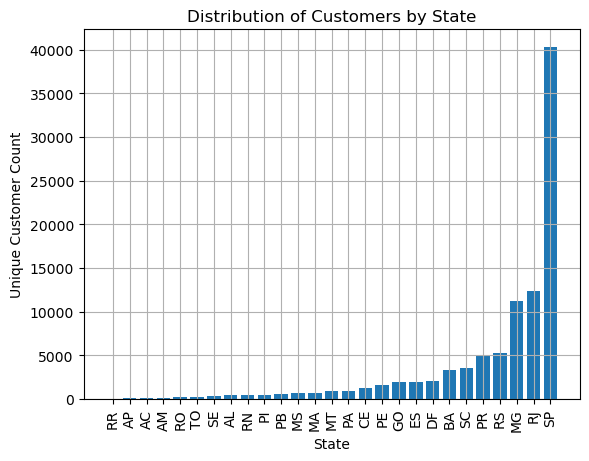

In [881]:
state_customer_counts = customers.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
state_customer_counts = state_customer_counts.rename(columns={'customer_unique_id': 'unique_customer_count'})

state_customer_counts = state_customer_counts.sort_values('unique_customer_count')

plt.bar(state_customer_counts['customer_state'], state_customer_counts['unique_customer_count'])
plt.xlabel('State')
plt.ylabel('Unique Customer Count')
plt.title('Distribution of Customers by State')
plt.xticks(rotation=90)
plt.grid()
plt.savefig('my_figure21.png')
plt.show()

Le graphique ci-dessus montre le nombre de commandes de produits achetées en fonction des états. En conséquence, São Paulo a le taux le plus élevé et il existe un écart énorme entre le reste des États.

In [882]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [883]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [884]:
#Comptons le nombre de jours entre la date prévue de livraison des biens achetés à lacheteur et la date réelle de livraison
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

#Recherchez différents jours de livraison et heures estimées.
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders_sorted = orders.sort_values(by='delivery_delay', ascending=False)

#orders['approval_to_carrier'] = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.days
print(orders_sorted[['customer_id', 'delivery_delay']])

                            customer_id  delivery_delay
55619  d306426abe5fca15e54b645e4462dc7b           188.0
19590  75683a92331068e2d281b11a7866ba44           181.0
11399  cb2caaaead400c97350c37a3fc536867           175.0
81401  65b14237885b3972ebec28c0f7dd2220           167.0
89130  9cf2c3fa2632cee748e1a59ca9d09b21           166.0
...                                 ...             ...
99283  0b0d6095c5555fe083844281f6b093bb             NaN
99313  b4cd0522e632e481f8eaf766a2646e86             NaN
99347  2f0524a7b1b3845a1a57fcf3910c4333             NaN
99348  726f0894b5becdf952ea537d5266e543             NaN
99415  32c9df889d41b0ee8309a5efb6855dcb             NaN

[99441 rows x 2 columns]


In [885]:
#Distribution des évaluations de livraison
bins = [-float('inf'), 0, 2, 5, 10, float('inf')]
labels = ['livré à temps', 'livré en avance', 'retard de livraison mineur', 'retard de livraison moyen', 'retard de livraison important']
ratings = [5, 4, 3, 2, 1]

orders_sorted['delivery_delay_category'] = pd.cut(orders_sorted['delivery_delay'], bins=bins, labels=labels)


orders_sorted['delivery_rating'] = pd.cut(orders_sorted['delivery_delay'], bins=bins, labels=ratings)

print(orders_sorted[['customer_id', 'delivery_delay', 'delivery_delay_category', 'delivery_rating']])

                            customer_id  delivery_delay   
55619  d306426abe5fca15e54b645e4462dc7b           188.0  \
19590  75683a92331068e2d281b11a7866ba44           181.0   
11399  cb2caaaead400c97350c37a3fc536867           175.0   
81401  65b14237885b3972ebec28c0f7dd2220           167.0   
89130  9cf2c3fa2632cee748e1a59ca9d09b21           166.0   
...                                 ...             ...   
99283  0b0d6095c5555fe083844281f6b093bb             NaN   
99313  b4cd0522e632e481f8eaf766a2646e86             NaN   
99347  2f0524a7b1b3845a1a57fcf3910c4333             NaN   
99348  726f0894b5becdf952ea537d5266e543             NaN   
99415  32c9df889d41b0ee8309a5efb6855dcb             NaN   

             delivery_delay_category delivery_rating  
55619  retard de livraison important               1  
19590  retard de livraison important               1  
11399  retard de livraison important               1  
81401  retard de livraison important               1  
89130  retard de

In [886]:
delivery_rating_counts = orders_sorted['delivery_rating'].value_counts()
print(delivery_rating_counts)


delivery_rating
5    89941
1     2093
2     1672
3     1400
4     1370
Name: count, dtype: int64


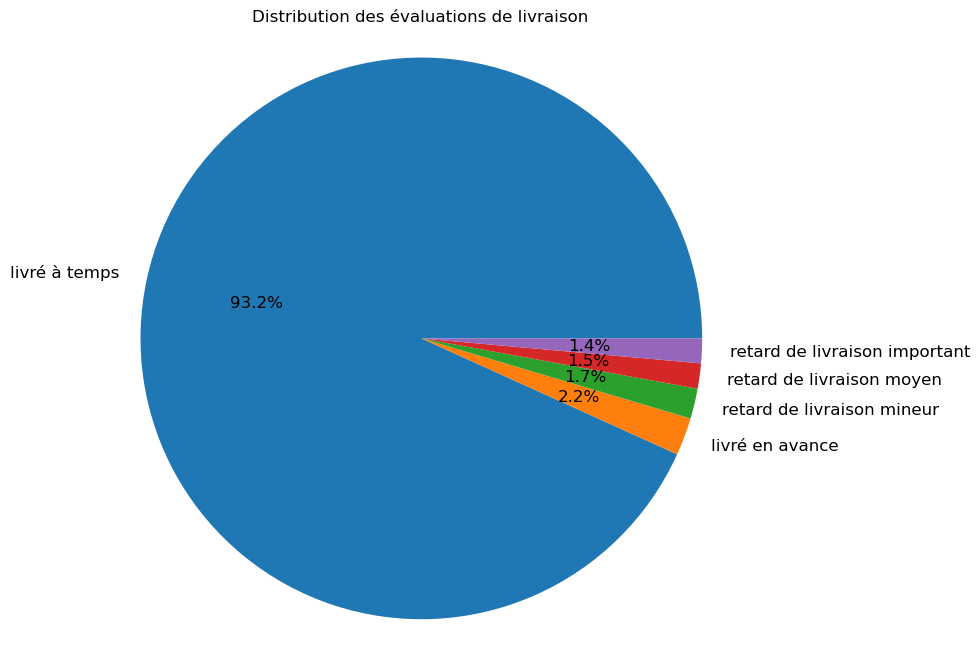

In [964]:
plt.figure(figsize=(8, 8))
labels = ['livré à temps', 'livré en avance', 'retard de livraison mineur', 'retard de livraison moyen', 'retard de livraison important']
plt.pie(delivery_rating_counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution des évaluations de livraison')
plt.axis('equal')
plt.savefig('my_figure29.png')
plt.show()

Voici le nombre de clients dans chaque catégorie de livraison :

Livré à temps (rating 5) : 89927 clients Retard de livraison important (rating 1) : 2093 clients Retard de livraison moyen (rating 2) : 1671 clients Retard de livraison mineur (rating 3) : 1400 clients Livré en avance (rating 4) : 1370 clients

In [889]:
#le nombre de clients qui ont fait des achats après une livraison en retard
delayed_delivery_customers = orders_sorted[orders_sorted['delivery_rating'] == 1]['customer_id'].unique()
repeat_customers_delayed_delivery = orders_sorted[orders_sorted['customer_id'].isin(delayed_delivery_customers)]['customer_id'].nunique()


In [890]:
repeat_customers_delayed_delivery

2093

In [891]:
 #le nombre de clients qui ont fait des achats après une livraison à temps
on_time_delivery_customers = orders_sorted[orders_sorted['delivery_rating'] == 5]['customer_id'].unique()
repeat_customers_on_time_delivery = orders_sorted[orders_sorted['customer_id'].isin(on_time_delivery_customers)]['customer_id'].nunique()
repeat_customers_on_time_delivery

89941

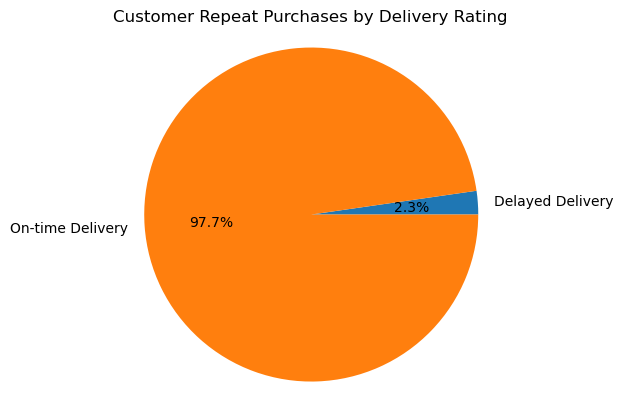

In [963]:
labels = ['Delayed Delivery', 'On-time Delivery']
values = [repeat_customers_delayed_delivery, repeat_customers_on_time_delivery]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 

plt.title('Customer Repeat Purchases by Delivery Rating')
plt.savefig('my_figure28.png')
plt.show()

In [893]:
df= pd.merge(customers, orders, on="customer_id")

In [894]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6.0


In [895]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  object        
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [896]:
df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [897]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [898]:
order_items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [899]:
order_items['order_id'].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [900]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [901]:
df= df.merge(order_items, on="order_id")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13.0,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6.0,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [902]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13.0,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6.0,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,-12.0,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,-9.0,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,7.0,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,-19.0,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [903]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [904]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [905]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [906]:
payment_totals = order_payments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
payment_totals

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64

In [907]:
order_payments[order_payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


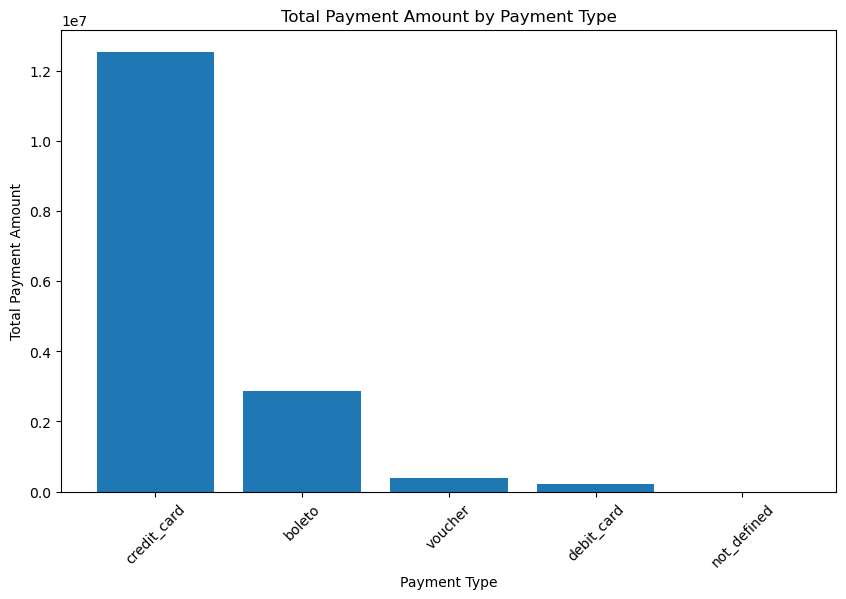

In [908]:
plt.figure(figsize=(10, 6))
plt.bar(payment_totals.index, payment_totals.values)
plt.xlabel('Payment Type')
plt.ylabel('Total Payment Amount')
plt.title('Total Payment Amount by Payment Type')
plt.xticks(rotation=45)
plt.savefig('my_figure23.png')
plt.show()

In [909]:
payment_installments_by_type = order_payments.groupby(['payment_installments', 'payment_type']).size()
print(payment_installments_by_type)

payment_installments  payment_type
0                     credit_card         2
1                     boleto          19784
                      credit_card     25455
                      debit_card       1529
                      not_defined         3
                      voucher          5775
2                     credit_card     12413
3                     credit_card     10461
4                     credit_card      7098
5                     credit_card      5239
6                     credit_card      3920
7                     credit_card      1626
8                     credit_card      4268
9                     credit_card       644
10                    credit_card      5328
11                    credit_card        23
12                    credit_card       133
13                    credit_card        16
14                    credit_card        15
15                    credit_card        74
16                    credit_card         5
17                    credit_card        

In [910]:
total_amount_installments = order_payments[order_payments['payment_installments'] > 1]['payment_value'].sum()
total_amount_no_installments = order_payments[order_payments['payment_installments'] == 1]['payment_value'].sum()

print("Le montant total des achats avec prêt :", total_amount_installments)
print("Le montant total des achats sans prêt:", total_amount_no_installments)

Le montant total des achats avec prêt : 10101450.13
Le montant total des achats sans prêt: 5907233.36


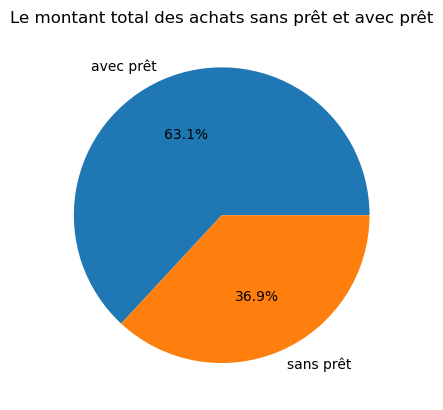

In [962]:
amounts = [total_amount_installments, total_amount_no_installments]
labels = ['avec prêt', 'sans prêt']

plt.pie(amounts, labels=labels, autopct='%1.1f%%')
plt.title('Le montant total des achats sans prêt et avec prêt')
plt.savefig('my_figure26.png')
plt.show()

In [912]:
order_payments['payment_sequential'].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: count, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


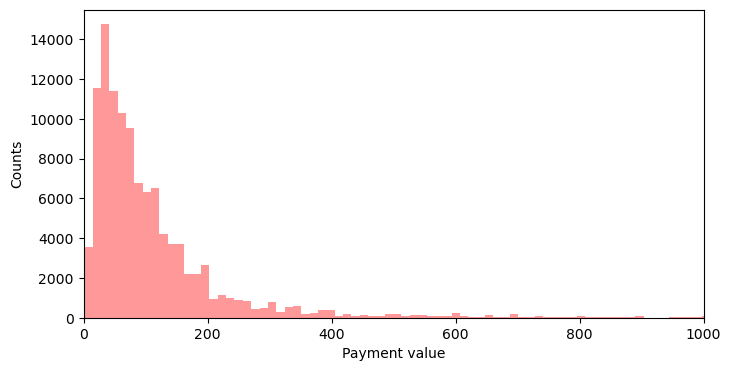

In [913]:
plt.figure(figsize=(8,4))
sns.distplot(df['price'],kde=False,bins=500,color='r')
plt.xlim([0,1000])
plt.xlabel('Payment value')
plt.ylabel('Counts')
plt.savefig('Counts_paymentvalue.eps',bbox_inches = 'tight');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


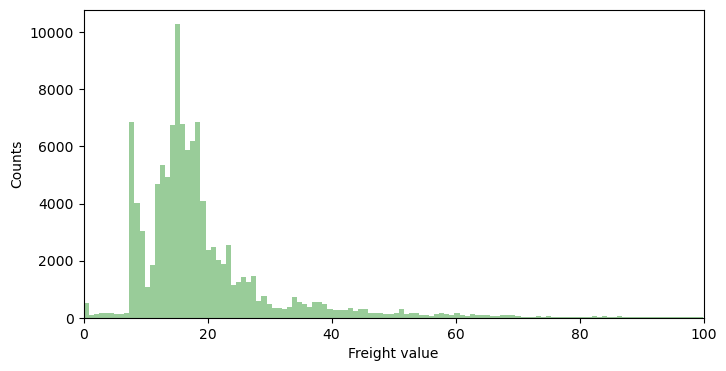

In [914]:
plt.figure(figsize=(8,4))
sns.distplot(df['freight_value'],kde=False,bins=500,color='g')
plt.xlim([0,100])
plt.xlabel('Freight value')
plt.ylabel('Counts')
plt.savefig('Counts_freight.eps',bbox_inches = 'tight')

In [915]:
df= df.merge(order_payments, on="order_id")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117601 non-null  object        
 1   customer_unique_id             117601 non-null  object        
 2   customer_zip_code_prefix       117601 non-null  int64         
 3   customer_city                  117601 non-null  object        
 4   customer_state                 117601 non-null  object        
 5   order_id                       117601 non-null  object        
 6   order_status                   117601 non-null  object        
 7   order_purchase_timestamp       117601 non-null  object        
 8   order_approved_at              117586 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 10  order_delivered_customer_date  115034 non-null  datetime64[ns]
 11  

In [916]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [917]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [918]:
df= df.merge(products, on="product_id")

In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117601 non-null  object        
 1   customer_unique_id             117601 non-null  object        
 2   customer_zip_code_prefix       117601 non-null  int64         
 3   customer_city                  117601 non-null  object        
 4   customer_state                 117601 non-null  object        
 5   order_id                       117601 non-null  object        
 6   order_status                   117601 non-null  object        
 7   order_purchase_timestamp       117601 non-null  object        
 8   order_approved_at              117586 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 10  order_delivered_customer_date  115034 non-null  datetime64[ns]
 11  

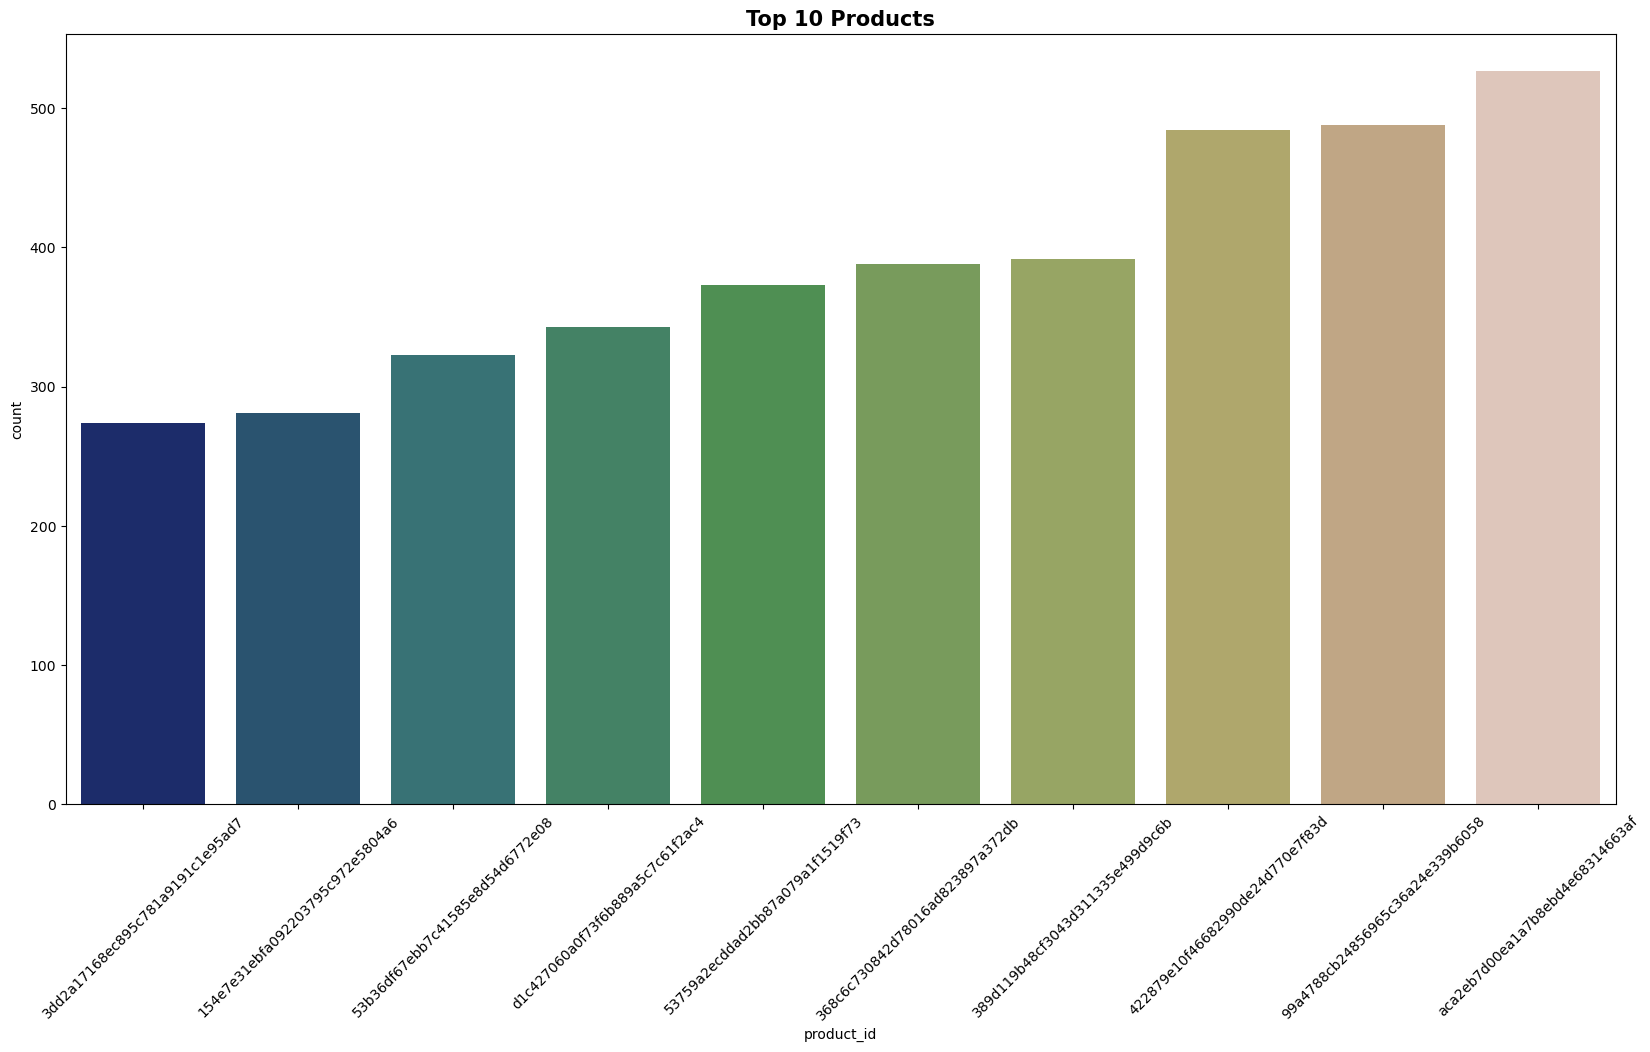

In [920]:
# Top 10 Products
plt.figure(figsize=(20,10))
sns.countplot(x='product_id', data=order_items, palette='gist_earth',
             order=order_items['product_id'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')
plt.xticks(rotation=45);

In [921]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [922]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [923]:
df.groupby(["product_category_name"])["product_id"].count().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                11823
beleza_saude                    9972
esporte_lazer                   8945
moveis_decoracao                8744
informatica_acessorios          8082
utilidades_domesticas           7355
relogios_presentes              6201
telefonia                       4721
ferramentas_jardim              4574
automotivo                      4379
brinquedos                      4273
cool_stuff                      3987
perfumaria                      3560
bebes                           3196
eletronicos                     2845
papelaria                       2617
fashion_bolsas_e_acessorios     2151
pet_shop                        2028
moveis_escritorio               1778
consoles_games                  1191
Name: product_id, dtype: int64

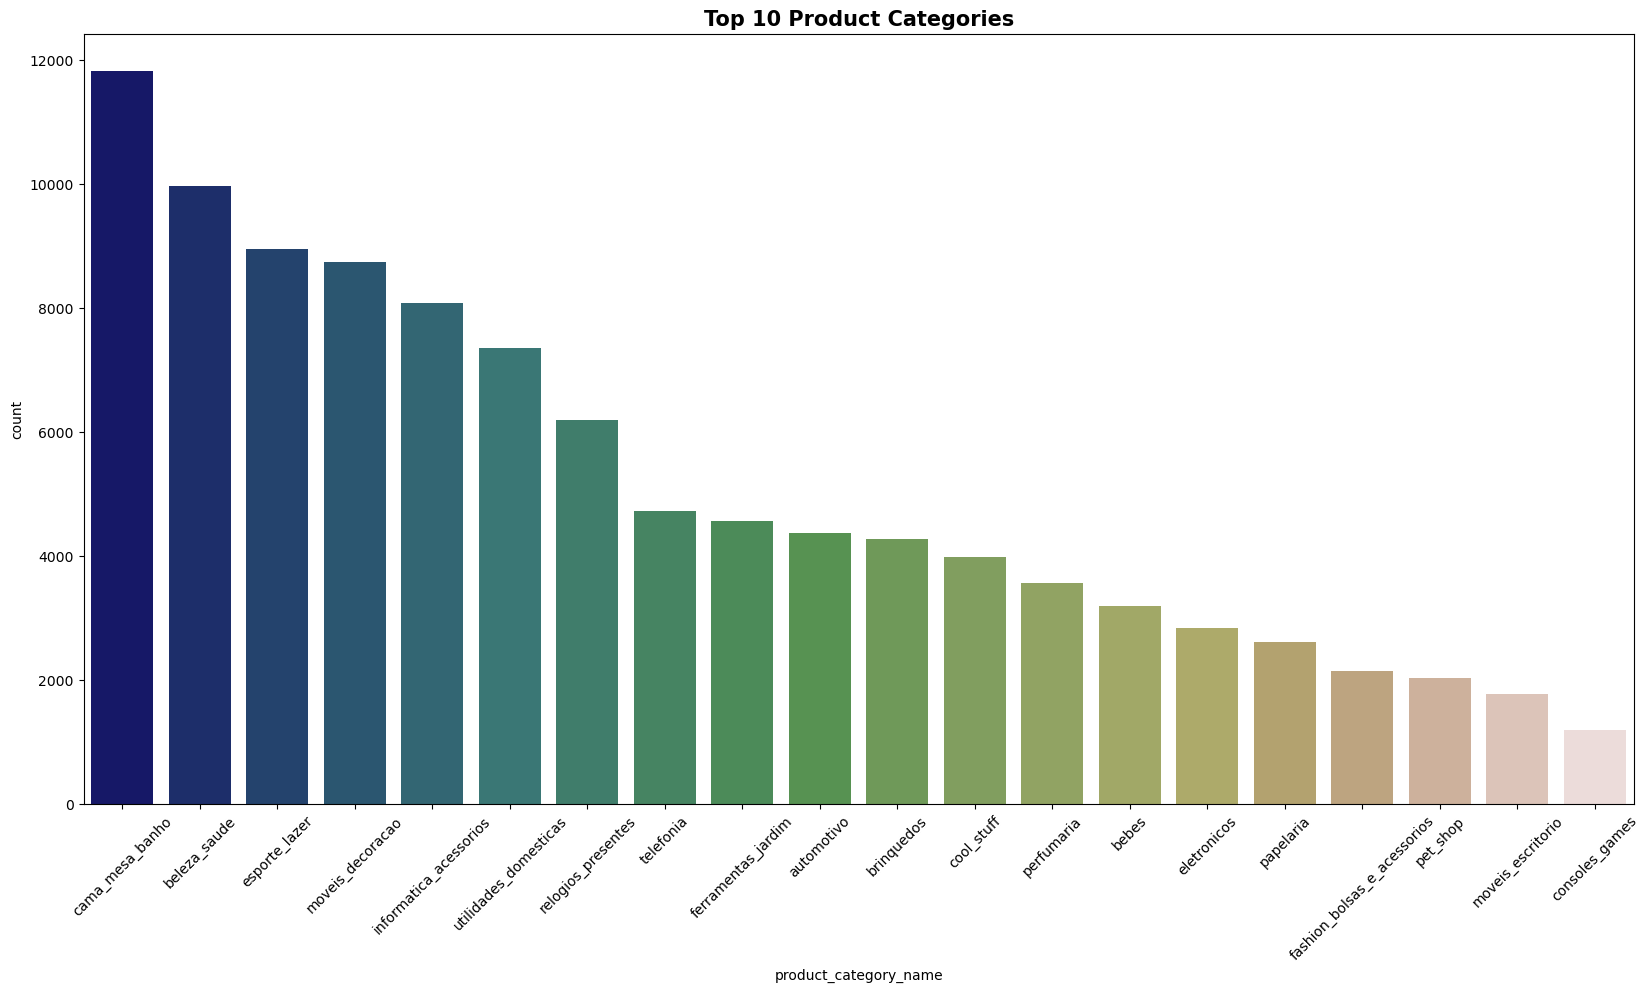

In [924]:
plt.figure(figsize=(20, 10))
sns.countplot(x='product_category_name', data=df, palette='gist_earth',
              order=df['product_category_name'].value_counts().index[:20])\
    .set_title("Top 10 Product Categories", fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.savefig('my_figure24.png')
plt.show()

In [925]:
df= df.merge(product_category, on='product_category_name')

In [926]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [927]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [928]:
df= df.merge(order_reviews, on="order_id")

In [929]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [930]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [931]:
df= df.merge(sellers, on='seller_id')

In [932]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [933]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


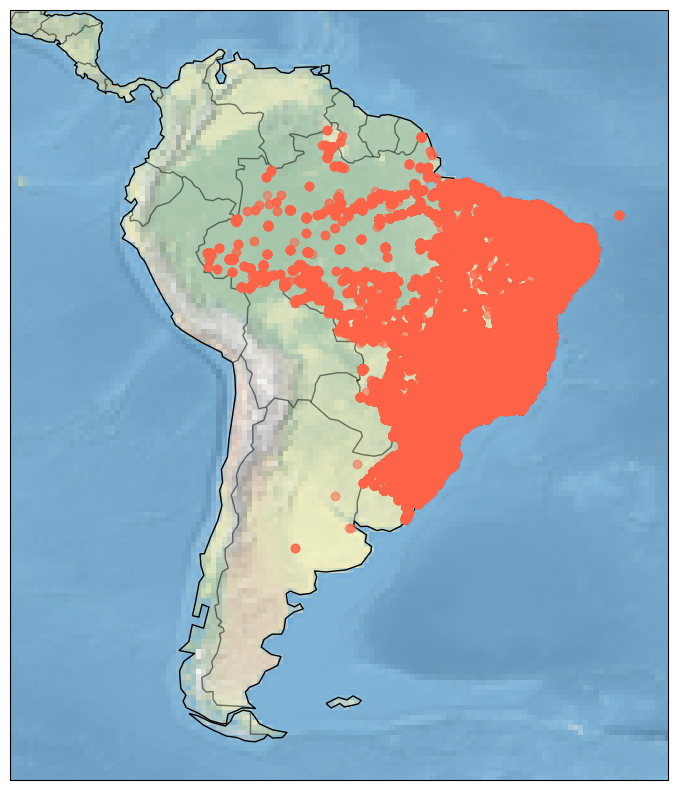

In [934]:
#geolocation=pd.read_csv('./olist_geolocation_dataset.csv', sep=',')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-92.269176, -27.581676, -55.401805, 13.884615])
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
ax.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], transform=ccrs.PlateCarree(), zorder=10, alpha=0.5, color='tomato')
plt.savefig('my_figure11.png')
plt.show()


In [935]:
geolocation['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

La carte ci-dessus montre l'emplacement des commandes de produits achetés et, selon la répartition de la population, explique le plus haut niveau d'achats sur la côte Est. Les clients vivant dans le nord et le nord-est du Brésil doivent supporter des frais d'expédition plus élevés et attendre plus longtemps pour recevoir leur achat.

In [936]:
np.max(df['payment_value'])

13664.08

In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  object        
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

In [938]:
df= df.drop(columns=['review_comment_title','review_comment_message','product_width_cm','product_height_cm',
                     'product_length_cm','product_weight_g','product_photos_qty','product_name_lenght',
                     'product_description_lenght'], axis=1)

In [939]:
df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
delivery_delay                   2400
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name               0
product_category_name_english       0
review_id                           0
review_score

In [940]:
df.shape

(115609, 32)

In [941]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [942]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_data = df.groupby('order_month')['customer_unique_id'].nunique()
monthly_data = monthly_data.reset_index()
fig = px.bar(monthly_data, x='order_month', y='customer_unique_id', title='Monthly active customers dynamics')
fig.show()



In [944]:
monthly_data_order = df.groupby('order_month')['order_id'].nunique()
monthly_data_order = monthly_data_order.reset_index()

import plotly.io as pio
fig = px.bar(monthly_data_order, x='order_month', y='order_id', title='Monthly N orders dynamics')
pio.write_image(fig, 'my_figure25.png')
fig.show()




In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

In [946]:
df=df.drop('order_month', axis=1)

<AxesSubplot:>

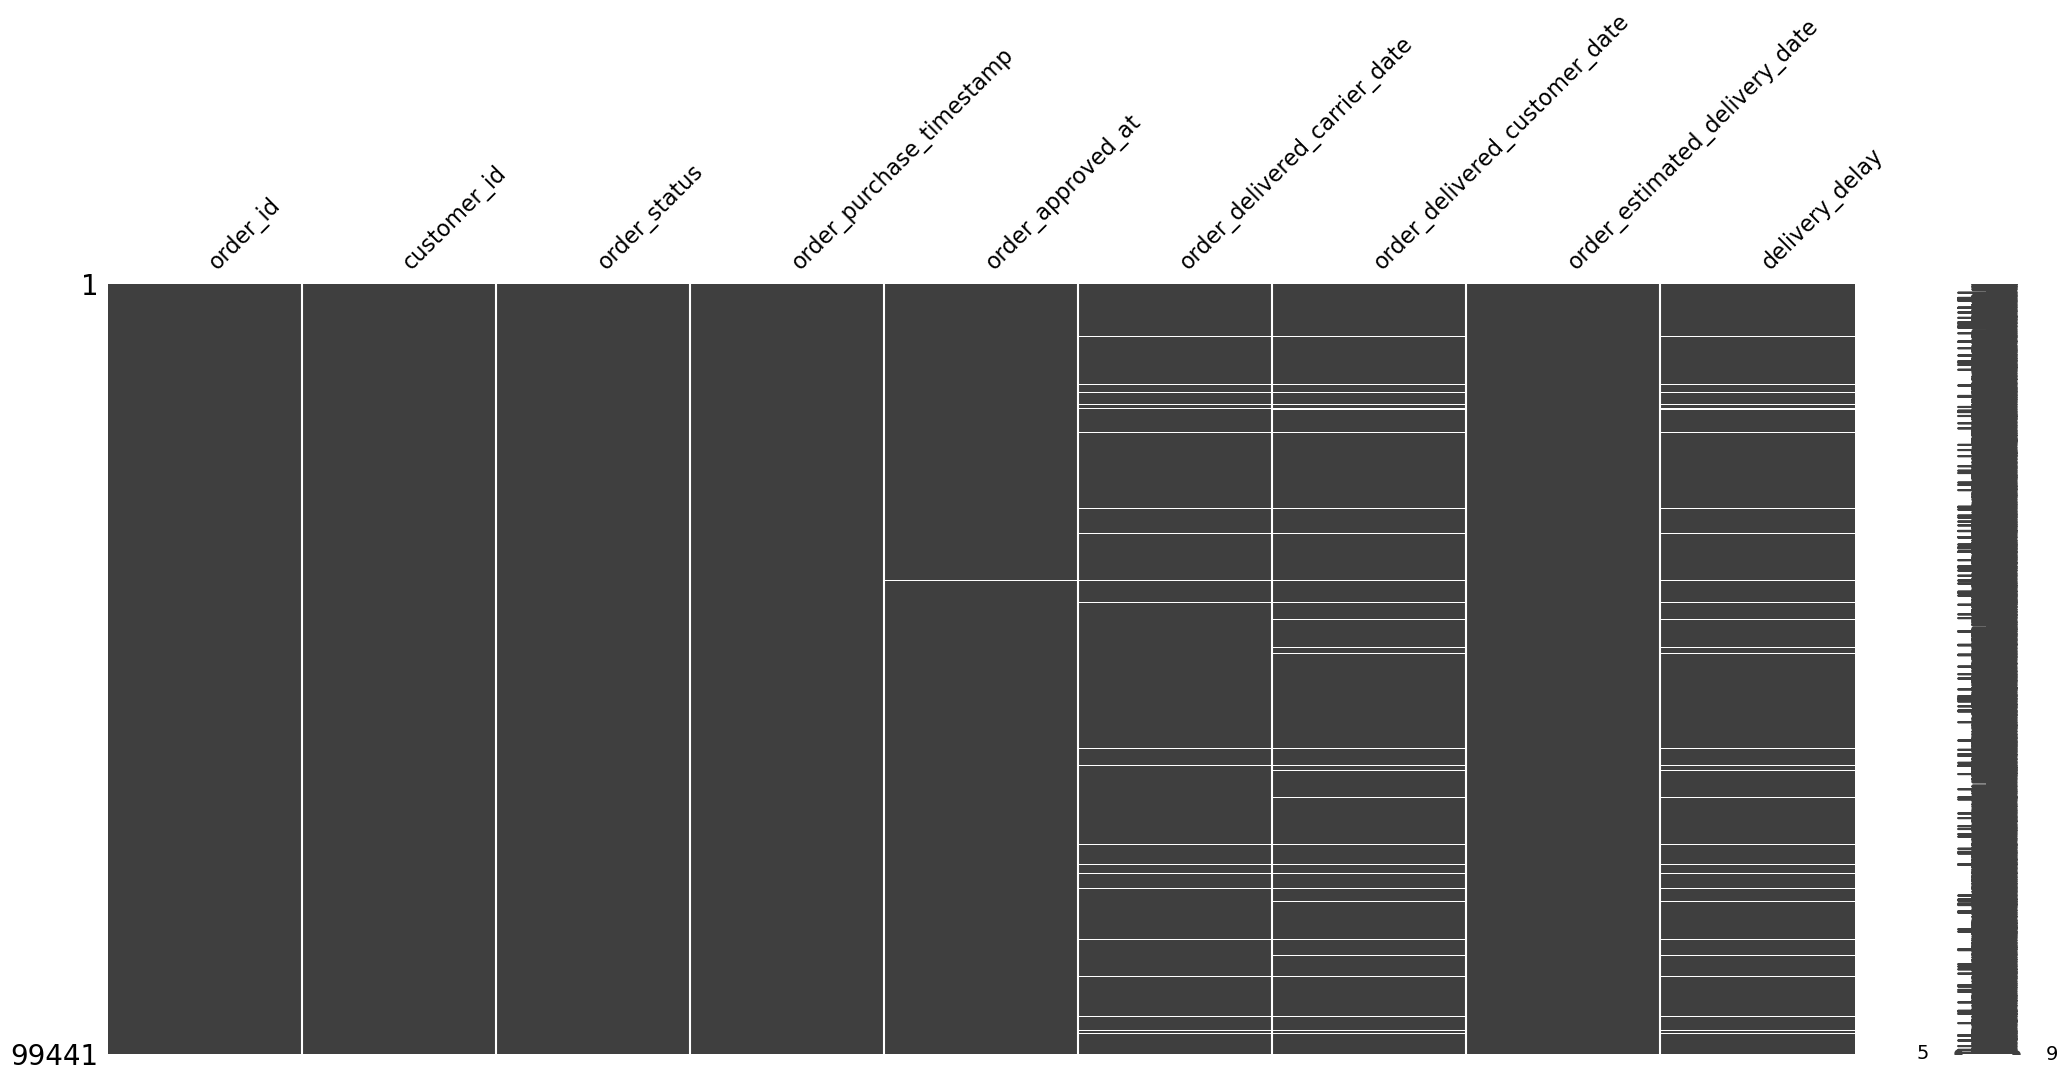

In [947]:
msno.matrix(orders)

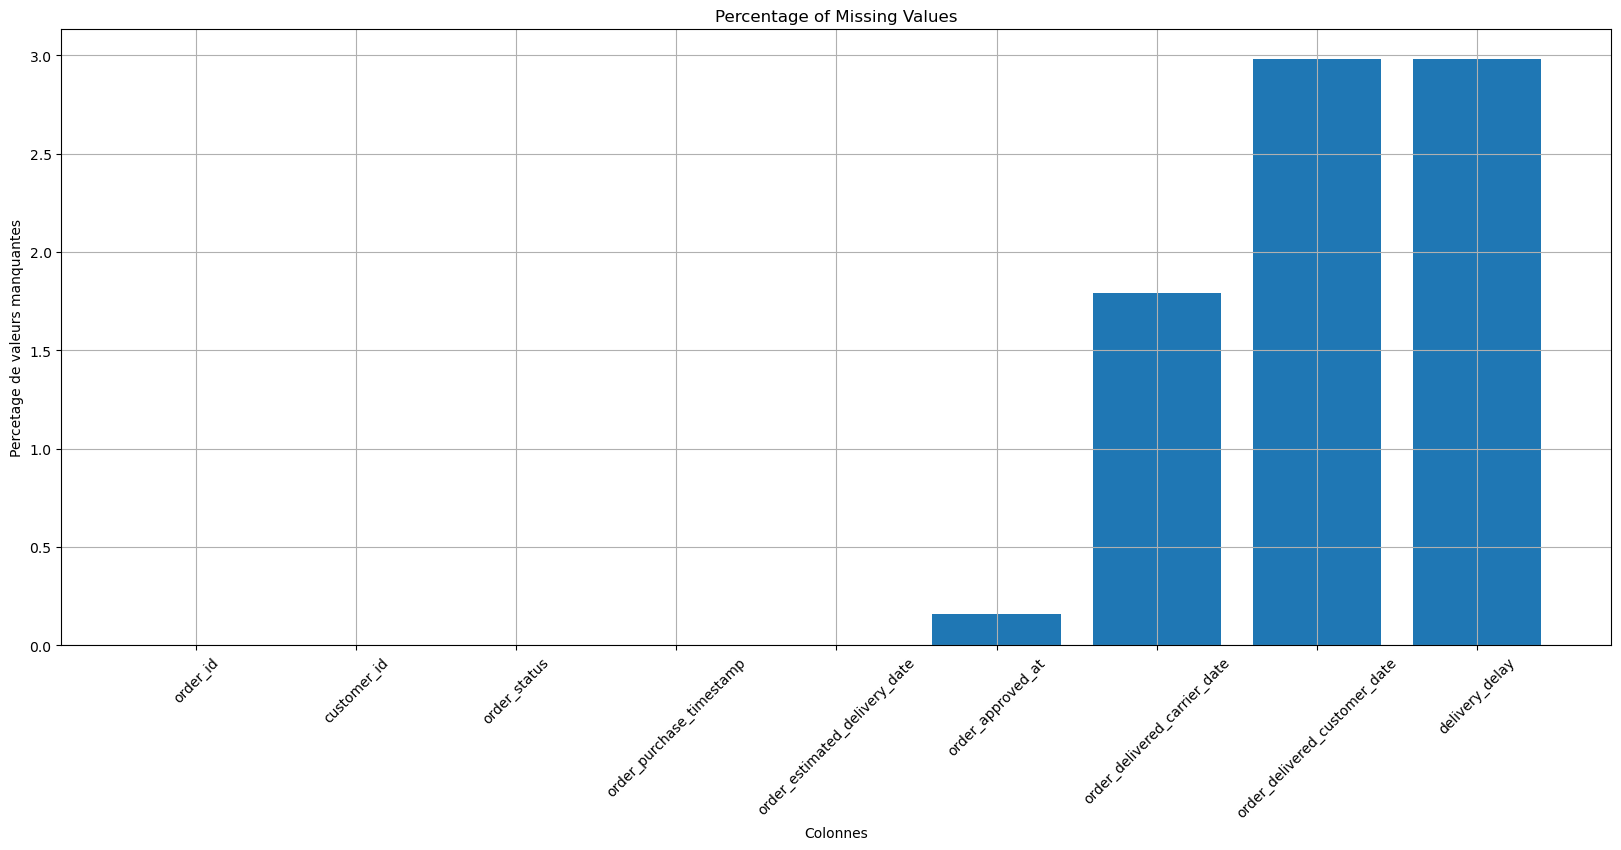

<Figure size 640x480 with 0 Axes>

In [948]:
def plot_missing_values(df):
    na_counts=(df.isna().sum()/len(df)*100).sort_values()
    plt.figure(figsize=(20,8))
    plt.title('Percentage of Missing Values')
    plt.bar(na_counts.index, na_counts)
    plt.xlabel('Colonnes')
    plt.ylabel('Percetage de valeurs manquantes')
    plt.xticks(rotation=45)
    plt.grid()
    plt.savefig("my_plot1.JPEG", bbox_inches="tight")
    plt.show()
    plt.savefig('my_figure22.png')
plot_missing_values(orders)

In [949]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()


In [950]:
corr

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
customer_id,1.000000,0.976476,0.196582,0.086806,0.044364,1.000000,0.038248,0.995464,0.917105,0.890413,0.946262,0.013691,0.010271,-0.063737,0.962910,0.953420,0.945086,0.262071,0.149898,-0.018370,-0.018731,0.020813,0.474109,0.253873,0.253873,0.995235,0.031733,0.013916,0.993455,0.824100,0.313857,0.147998
customer_unique_id,0.976476,1.000000,0.202650,0.089445,0.045540,0.976476,0.037213,0.975629,0.896290,0.868958,0.923856,0.012531,0.009883,-0.064633,0.939368,0.927773,0.922562,0.257579,0.149925,-0.021176,-0.018508,0.016655,0.466277,0.250634,0.250634,0.981172,0.028292,0.013118,0.979368,0.806487,0.309454,0.145927
customer_zip_code_prefix,0.196582,0.202650,1.000000,0.399594,0.210449,0.196582,0.005625,0.196740,0.186966,0.182337,0.187759,0.010832,0.004853,-0.031243,0.187522,0.157590,0.190241,0.055094,0.083597,-0.011636,-0.000240,0.011117,0.125929,0.059279,0.059279,0.198240,0.003464,0.009606,0.198061,0.150495,0.074039,0.045639
customer_city,0.086806,0.089445,0.399594,1.000000,0.223909,0.086806,-0.006842,0.087159,0.081074,0.087724,0.086605,0.016032,-0.002032,-0.025505,0.083997,0.073699,0.082628,0.026237,0.064494,-0.025089,-0.001822,0.037496,0.056878,0.026427,0.026427,0.087207,0.002868,-0.000698,0.087210,0.072483,0.043943,0.031052
customer_state,0.044364,0.045540,0.210449,0.223909,1.000000,0.044364,-0.004526,0.044323,0.044089,0.051801,0.041371,0.007052,0.050672,-0.016222,0.043965,0.036227,0.045213,0.012241,0.122099,-0.022789,-0.015153,0.052043,0.058861,0.020393,0.020393,0.043779,-0.026992,0.006935,0.043745,0.042685,0.037390,0.073876
order_id,1.000000,0.976476,0.196582,0.086806,0.044364,1.000000,0.038248,0.995464,0.917105,0.890413,0.946262,0.013691,0.010271,-0.063737,0.962910,0.953420,0.945086,0.262071,0.149898,-0.018370,-0.018731,0.020813,0.474109,0.253873,0.253873,0.995235,0.031733,0.013916,0.993455,0.824100,0.313857,0.147998
order_status,0.038248,0.037213,0.005625,-0.006842,-0.004526,0.038248,1.000000,0.037959,0.036868,-0.142552,-0.203368,0.011716,-0.135112,0.005207,0.035525,0.041339,0.037191,0.022188,0.011750,0.013134,0.002232,0.001749,0.032135,0.009058,0.009058,0.037503,-0.096526,0.030768,0.037112,0.033285,0.010322,0.002032
order_purchase_timestamp,0.995464,0.975629,0.196740,0.087159,0.044323,0.995464,0.037959,1.000000,0.914058,0.886826,0.942127,0.013874,0.010238,-0.063176,0.958205,0.948167,0.941064,0.260760,0.150069,-0.018053,-0.018170,0.020086,0.472005,0.252912,0.252912,0.993503,0.031541,0.013901,0.991714,0.820665,0.313722,0.148227
order_approved_at,0.917105,0.896290,0.186966,0.081074,0.044089,0.917105,0.036868,0.914058,1.000000,0.825076,0.867467,0.020609,0.008869,-0.062888,0.883523,0.864460,0.924307,0.238065,0.139192,-0.009511,-0.034278,0.032704,0.437800,0.230068,0.230068,0.914151,0.028027,0.020766,0.912451,0.751586,0.288933,0.137739
order_delivered_carrier_date,0.890413,0.868958,0.182337,0.087724,0.051801,0.890413,-0.142552,0.886826,0.825076,1.000000,0.890571,0.005811,0.027150,-0.060066,0.857752,0.835884,0.843548,0.226742,0.122087,-0.014806,-0.016358,0.016751,0.417557,0.225835,0.225835,0.885890,0.039539,0.002554,0.884560,0.740029,0.284675,0.141334


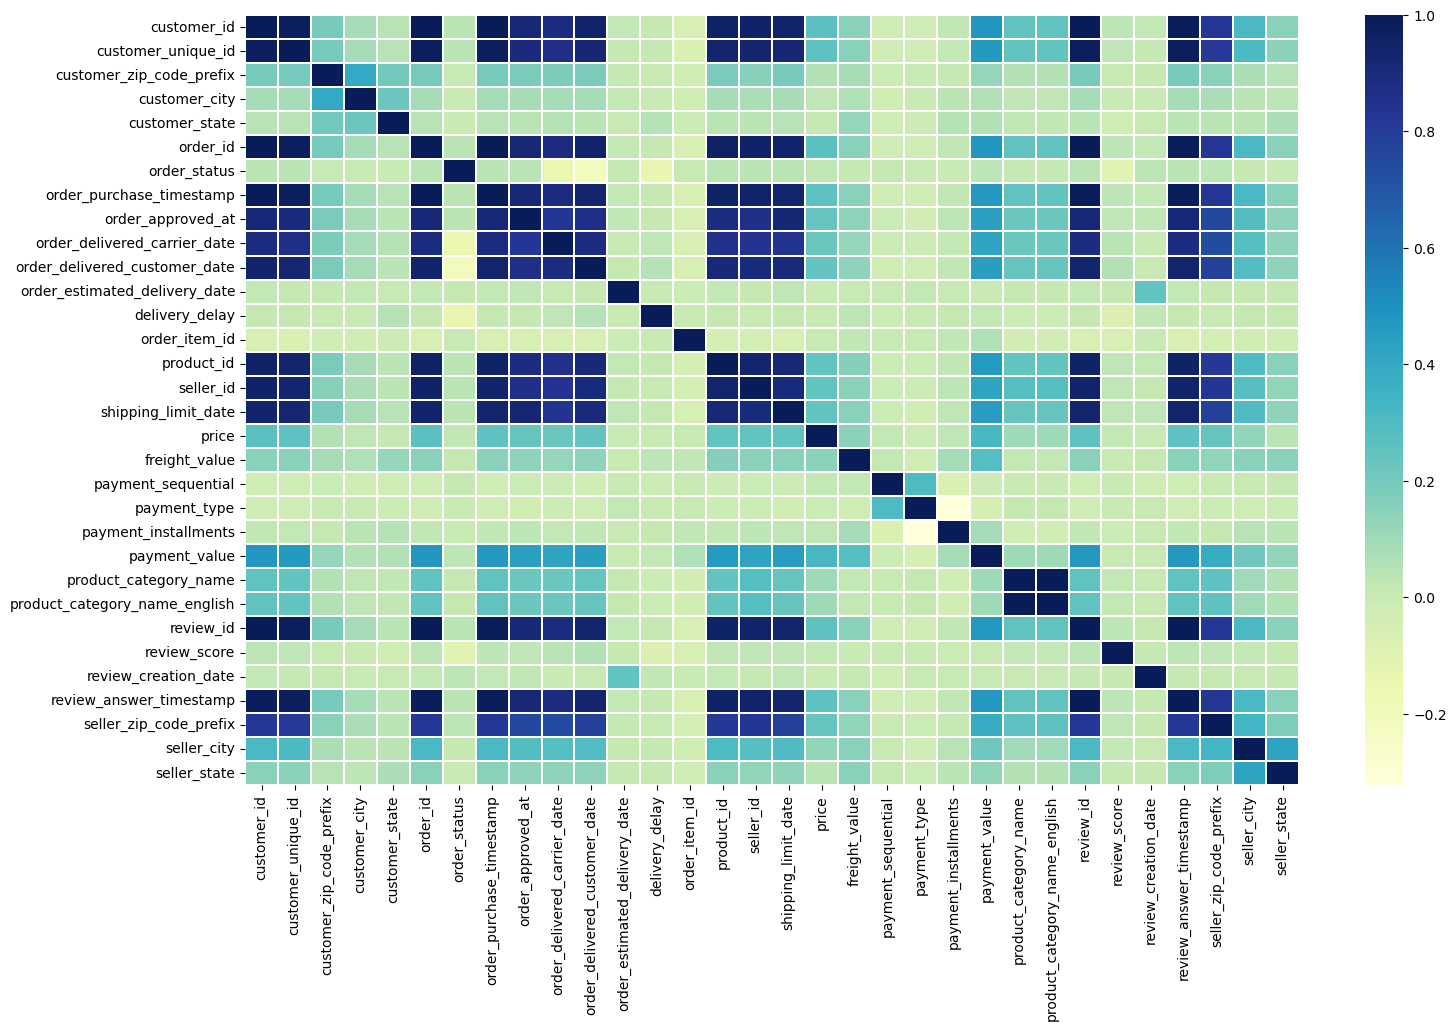

In [951]:
plt.figure(figsize=(17, 10))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
plt.show()

In [952]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,moveis_escritorio,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,-21.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,moveis_escritorio,office_furniture,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,-21.0,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1,credit_card,1,275.79,moveis_escritorio,office_furniture,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,-17.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1,credit_card,7,140.61,moveis_escritorio,office_furniture,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,-22.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1,credit_card,10,137.58,moveis_escritorio,office_furniture,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,8577,itaquaquecetuba,SP


In [953]:
df[df['payment_value']==13664.08]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
97098,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97099,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97100,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97101,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97102,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97103,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97104,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97105,1617b1357756262bfa56ab541c47bc16,0

In [870]:
df = df.sort_values('payment_value', ascending=False)
df.head(15)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
97101,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97102,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97104,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97098,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97103,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97099,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97105,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,-6.0,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1,credit_card,1,13664.08,telefonia_fixa,fixed_telephony,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,3667,sao paulo,SP
97100,1617b1357756262bfa56ab541c47bc16,0

In [954]:
monetary1 = df.groupby(['customer_unique_id', 'order_id'])['payment_value'].first().groupby(level=0).sum()
monetary1 = monetary1.sort_values(ascending=False)
monetary1

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13664.08
da122df9eeddfedc1dc1f5349a1a690c     7571.63
763c8b1c9c68a0229c42c9fc6f662b93     7274.88
dc4802a71eae9be1dd28f5d788ceb526     6929.31
ff4159b92c40ebe40454e3e6a7c35ed6     6726.66
                                      ...   
967d07493b6792043f97262a0a4b15f8        0.01
e6915acf7e23a8c5a80bead3b5aea8c9        0.01
11f78d8517618f460d3a1179f42b6f9f        0.01
c82a940bf171daec9b52b594db8d9a62        0.01
329932a796b9bc326d71e3b932182cdf        0.01
Name: payment_value, Length: 93396, dtype: float64

In [955]:
df['payment_value'].max()

13664.08

In [956]:
df['total_value'] = df['price'] + df['freight_value']

In [957]:
df.shape

(115609, 33)

In [751]:
#data=df[df['order_status']=='delivered']

In [958]:
data=df[['order_id','customer_unique_id', 'order_purchase_timestamp', 'total_value']]

In [959]:
data.head()

,order_id,customer_unique_id,order_purchase_timestamp,total_value
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87
1,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,137.89
2,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,137.89
3,b1a5d5365d330d10485e0203d54ab9e8,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61
4,2e604b3614664aa66867856dba7e61b7,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58


In [960]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115609 non-null  object        
 1   customer_unique_id        115609 non-null  object        
 2   order_purchase_timestamp  115609 non-null  datetime64[ns]
 3   total_value               115609 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


In [961]:
data.to_csv('données_exp.csv', index=False)